In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from pandas.plotting import table
import matplotlib.pyplot as plt

codigo usado para ler todos os arquivos de saida do programa passado pelo peixoto e transforma-los em um dataset

In [2]:
cte_height = 1080;
cte_width = 1920;

Aqui nos lemos o dataset que dividimos em 4 partes para caber no Github

In [5]:
Info1 = pd.read_csv("Depth0_part1")
Info2 = pd.read_csv("Depth0_part2")
Info3 = pd.read_csv("Depth0_part3")
Info4 = pd.read_csv("Depth0_part4")
Informacoes = pd.concat([Info1,Info2,Info3,Info4])

In [6]:
Informacoes.set_index("index",inplace=True)

In [7]:
Informacoes.shape

(6120000, 6)

In [8]:
Informacoes.head()

,Origem,Frame,Height,Width,QP,Split
index,,,,,,
0,Crowdrun,323,0,0,41,1
1,Crowdrun,323,0,64,41,1
2,Crowdrun,323,0,128,41,0
3,Crowdrun,323,0,192,41,0
4,Crowdrun,323,0,256,41,0


dropando as linhas que o CU já é cortado, desta forma não o utilizaremos para treinar a rede neural

In [10]:
Informacoes.shape

(5760000, 6)

In [11]:
Informacoes.head()

,Origem,Frame,Height,Width,QP,Split
index,,,,,,
0,Crowdrun,323,0,0,41,1
1,Crowdrun,323,0,64,41,1
2,Crowdrun,323,0,128,41,0
3,Crowdrun,323,0,192,41,0
4,Crowdrun,323,0,256,41,0


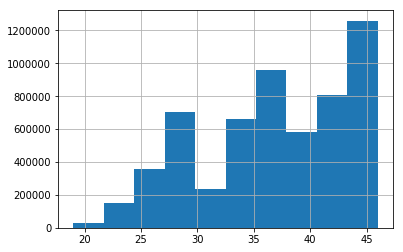

In [12]:
Informacoes['QP'].hist()

In [13]:
os.getcwd()

'/home/tomas/Desktop/UNB/Deeplearning_Video_Compressing'

Lemos os videos para podermos mapear o canal Y de cada frame

In [11]:
parkjoy = np.fromfile('./Videos/ParkJoy_1920x1080_50_8bit_420.yuv',dtype='uint8')
rushhour= np.fromfile('./Videos/RushHour_1920x1080_25_8bit_420.yuv',dtype='uint8')
oldtown = np.fromfile('./Videos/OldTownCross_1920x1080_50_8bit_420.yuv',dtype='uint8')
ducks = np.fromfile('./Videos/DucksTakeOff_1920x1080_50_8bit_420.yuv',dtype='uint8')
crowdrun = np.fromfile('./Videos/Crowdrun_1920x1080_50_8bit_420.yuv',dtype='uint8')
sunflower = np.fromfile('./Videos/Sunflower_1920x1080_25_8bit_420.yuv',dtype='uint8')

In [12]:
crowdrun.shape

(1555200000,)

In [13]:
parkjoy.shape

(1555200000,)

In [14]:
rushhour.shape

(1555200000,)

In [15]:
oldtown.shape

(1555200000,)

In [16]:
ducks.shape

NameError: name 'ducks' is not defined

In [17]:
crowdrun.shape

(1555200000,)

In [18]:
sunflower.shape

(1555200000,)

In [20]:
Map = {"OldTown":oldtown,'Crowdrun':crowdrun,'SunFlower':sunflower,"ParkJoy":parkjoy,'Ducks':ducks,'RushHour':rushhour}

In [21]:
def generate_input(row,cte_height,cte_width):
    begin_Frame = int(row['Frame'])*(cte_height*cte_width + cte_height*cte_width/2)
    end_Frame = (int(row['Frame']))*(cte_height*cte_width + cte_height*cte_width/2)+cte_height*cte_width
    begin_Frame = int(begin_Frame)
    end_Frame = int(end_Frame)
    Input = (Map[row['Origem']][begin_Frame:end_Frame].reshape([cte_height,cte_width]))[row['Height']:row['Height']+64,row['Width']:row['Width']+64]
    return np.append(Input.reshape(1,64*64)[0],row["QP"])

In [ ]:
Info["INPUT"] = Info.apply(lambda x : generate_input(x,cte_height,cte_width),axis=1)

In [ ]:
Info

In [24]:
begin_Frame = int(Training_set.iloc[i]['Frame'])*(cte_height*cte_width + cte_height*cte_width/2)
end_Frame = (int(Training_set.iloc[i]['Frame']))*(cte_height*cte_width + cte_height*cte_width/2)+cte_height*cte_width
begin_Frame = int(begin_Frame)
end_Frame = int(end_Frame)

NameError: name 'Training_set' is not defined

In [64]:
Input = Map[Training_set.iloc[i]['Origem']][begin_Frame:end_Frame].reshape([cte_height,cte_width])
Height = Training_set.iloc[i]["Height"]
Width = Training_set.iloc[i]["Width"]
Input_2  = Input[Height:Height+64,Width:Width+64]
Input_2 = Input_2.reshape(1,64*64)[0]
Input_2 = np.append(Input_2,Training_set.iloc[i]["QP"])
Output = Training_set.iloc[i]["Split"]

In [23]:
Data_Validation = Informacoes.iloc[int(4*Informacoes.shape[0]/5):].copy()

In [24]:
Test_set = Informacoes.iloc[int(3*Informacoes.shape[0]/5):int(4*Informacoes.shape[0]/5)].copy()

In [25]:
Training_set = Informacoes.iloc[:int(3*Informacoes.shape[0]/5)].copy()

In [26]:
Informacoes.head()

,Origem,Frame,Height,Width,QP,Split
index,,,,,,
4800672,Ducks,419,64,768,36,0
1086346,RushHour,118,64,1024,45,0
4777884,Ducks,80,384,1536,28,1
812234,ParkJoy,346,640,896,34,1
4011227,RushHour,241,128,1088,41,0


Tentando fazer usando uma parte da Info de cada vez, ver se a memoria Ram aguenta
Rodar essa parte toda para cada depth part e cada video

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from pandas.plotting import table
import matplotlib.pyplot as plt

In [2]:
cte_height = 1080;
cte_width = 1920;

In [2]:
Info = pd.read_csv("Depth0_part1")

In [3]:
Info.set_index("index",inplace=True)

In [4]:
Info['Origem'].unique()

array(['Crowdrun', 'SunFlower', 'ParkJoy', 'RushHour', 'OldTown'],
      dtype=object)

In [5]:
Info["Height_Final"] = Info["Height"]+63
Info["Width_Final"] = Info["Width"]+63
Info.drop(Info.loc[(Info["Height_Final"]>cte_height)|(Info["Width_Final"]>cte_width)].index,inplace=True)
Info.drop(columns=['Height_Final',"Width_Final"],inplace=True)

NameError: name 'cte_height' is not defined

In [8]:
Info = Info.loc[Info['Origem'].str.contains("Crow")].copy()

In [8]:
#parkjoy = np.fromfile('./Videos/ParkJoy_1920x1080_50_8bit_420.yuv',dtype='uint8')
#rushhour= np.fromfile('./Videos/RushHour_1920x1080_25_8bit_420.yuv',dtype='uint8')
#oldtown = np.fromfile('./Videos/OldTownCross_1920x1080_50_8bit_420.yuv',dtype='uint8')
#ducks = np.fromfile('./Videos/DucksTakeOff_1920x1080_50_8bit_420.yuv',dtype='uint8')
crowdrun = np.fromfile('./Videos/Crowdrun_1920x1080_50_8bit_420.yuv',dtype='uint8')
#sunflower = np.fromfile('./Videos/Sunflower_1920x1080_25_8bit_420.yuv',dtype='uint8')

In [9]:
#Map = {"OldTown":oldtown,'Crowdrun':crowdrun,'SunFlower':sunflower,"ParkJoy":parkjoy,'RushHour':rushhour}
Map = {'Crowdrun':crowdrun}

In [10]:
def generate_input(row,cte_height,cte_width):
    begin_Frame = int(row['Frame'])*(cte_height*cte_width + cte_height*cte_width/2)
    end_Frame = (int(row['Frame']))*(cte_height*cte_width + cte_height*cte_width/2)+cte_height*cte_width
    begin_Frame = int(begin_Frame)
    end_Frame = int(end_Frame)
    Input = (Map[row['Origem']][begin_Frame:end_Frame].reshape([cte_height,cte_width]))[row['Height']:row['Height']+64,row['Width']:row['Width']+64]
    return np.append(Input.reshape(1,64*64)[0],row["QP"])

In [11]:
Info["INPUT"] = Info.apply(lambda x : generate_input(x,cte_height,cte_width),axis=1)

In [13]:
Info.to_csv("./Depth_0/Crowdrun1")